Number of Lines Detected:  66
Number of Nodes Detected:  62
Number of Clusters Detected:  8


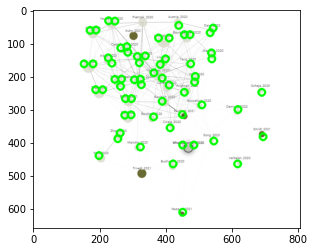

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


# Reading the input image
img = cv2.imread('graph.png')
 
# convert to grayscale
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


imager=cv2.imread('graph.png',0)
size1=2
gauss_kernel = np.ones((size1,size1),np.float32)/(size1*size1)
imager = cv2.filter2D(imager,-1,gauss_kernel)

size2=3
eros_kernel = np.ones((size2,size2), np.uint8)
img_erosion = cv2.erode(imager, eros_kernel, iterations=2)
 
#-------------------------------------------------------
imager=img_erosion
for i in range(imager.shape[0]):
    for j in range(imager.shape[1]):
        if imager[i,j]<=120:
            imager[i,j]=255
size3=2
fin_gauss_kernel = np.ones((size3,size3),np.float32)/(size3*size3)
imager = cv2.filter2D(imager,-1,fin_gauss_kernel)


# perform edge detection
edges = cv2.Canny(imager, 10, 10)

# detect lines in the image using hough lines technique
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 60, np.array([]), 50, 5)

# iterate over the output lines and draw them
num_lines=0
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(grayscale, (x1, y1), (x2, y2), (20, 220, 20), 3)
        num_lines+=1
        
print("Number of Lines Detected: ", num_lines)

##-----------------------------------------------------------------------------
##-----------------------------------------------------------------------------
##-----------------------------------------------------------------------------

from skimage import data
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.lines as mlines





# Reading the input image
img = cv2.imread('graph.png')
 
# convert to grayscale
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


imager=cv2.imread('graph.png',0)
size1=2
gauss_kernel = np.ones((size1,size1),np.float32)/(size1*size1)
imager = cv2.filter2D(imager,-1,gauss_kernel)

size2=3
dil_kernel = np.ones((size2,size2), np.uint8)
img_dilation = cv2.dilate(img, dil_kernel, iterations=2)


img_pre= cv2.cvtColor(img_dilation, cv2.COLOR_BGR2GRAY)
for i in range(img_pre.shape[0]):
    for j in range(img_pre.shape[1]):
        if img_pre[i,j]<=230:
            img_pre[i,j]=0

size1=2
gauss_kernel = np.ones((size1,size1),np.float32)/(size1*size1)
imager = cv2.filter2D(img_pre,-1,gauss_kernel)

size2=3
ero_kernel = np.ones((size2,size2), np.uint8)
img_ero = cv2.erode(imager , ero_kernel, iterations=1)


img1=img_ero

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img1,None)

#---------------------Filtering of Keypoints-------------------
thresholder=17
keypointer=[]
for indie in range(len(kp)):
    if indie==0:
        keypointer.append(kp[indie])
    else:
        x=kp[indie].pt[0]
        y=kp[indie].pt[1]
        test_len=0
        for p in range(len(keypointer)):
            xp=keypointer[p].pt[0]
            yp=keypointer[p].pt[1]
            
            dist=((x-xp)**2+(y-yp)**2)**0.5
            
            if (dist>=thresholder):
                test_len+=1
            
        if test_len==len(keypointer):
            keypointer.append(kp[indie])

 
#-----------------------------------------------------------------------

def drawKeyPts(im,keyp,col,th):
    for curKey in keyp:
        x=np.int(curKey.pt[0])
        y=np.int(curKey.pt[1])
        size = 10
        cv2.circle(im,(x,y),size, col,thickness=th, lineType=8, shift=0) 
    plt.imshow(im)    
    return im 


imWithCircles = drawKeyPts(img,keypointer,(0,255,0),5)

print("Number of Nodes Detected: ", len(keypointer))

##-----------------------------------------------------------------------------
##-----------------------------------------------------------------------------
##-----------------------------------------------------------------------------


import cv2
import numpy as np
 
# Reading the input image
img = cv2.imread('graph.png', 0)
 
size1=2
gauss_kernel = np.ones((size1,size1),np.float32)/(size1*size1)
imager = cv2.filter2D(img,-1,gauss_kernel)

size2=3
fil_kernel = np.ones((size2,size2), np.uint8)
img_dilation = cv2.dilate(imager, fil_kernel, iterations=2)
img_erosion = cv2.erode(img_dilation, fil_kernel, iterations=30)


# convert to grayscale
image = img_erosion
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j]<=245:
            image[i,j]=0
        else:
            image[i,j]=255

            
img_dilation2 = cv2.dilate(image, fil_kernel, iterations=20)


#------------------------------------------------Filling cavities-------------------
# Read image
im_in = img_dilation2

# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.

th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV);

# Copy the thresholded image.
im_floodfill = im_th.copy()

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
#------------------------------------------------------------------------------------------

# cv2.imshow('Input', img)
# cv2.imshow('Erosion', img_dilation2)
 
# cv2.waitKey(0)
#------------------------------------------------------------
def connected_component_label(img,org_image):
    
   
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    print("Number of Clusters Detected: ", num_labels)
    
connected_component_label(im_out,img)
